# 6.2 Exploring relationships

## 1 Importing visualization libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Importing path
path = r'C:\Users\Aricia\11-2025 Chocolate Bar Ratings'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'df_choc_clean.csv'), index_col = False)

## 2 Checking cleaned data

In [4]:
df.shape

(1795, 9)

In [5]:
df.columns

Index(['Unnamed: 0', 'company_manufacturer', 'bar_origin', 'review_ID',
       'review_date', 'cocoa_percentage', 'company_location', 'rating',
       'bean_region'],
      dtype='object')

In [6]:
df.head (5)

,Unnamed: 0,company_manufacturer,bar_origin,review_ID,review_date,cocoa_percentage,company_location,rating,bean_region
0,0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


In [7]:
# Dropping the Unnamed column 

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df.head(5)

,company_manufacturer,bar_origin,review_ID,review_date,cocoa_percentage,company_location,rating,bean_region
0,A. Morin,Agua Grande,1876,2016,0.63,France,3.75,Sao Tome
1,A. Morin,Kpime,1676,2015,0.70,France,2.75,Togo
2,A. Morin,Atsane,1676,2015,0.70,France,3.00,Togo
3,A. Morin,Akata,1680,2015,0.70,France,3.50,Togo
4,A. Morin,Quilla,1704,2015,0.70,France,3.50,Peru


## 3 Exploring relationships 

### Correlations

In [10]:
# Create a subset excluding the qualitative data , as the goal is toshow statistical relationship between variables

sub = df[['review_ID', 'review_date', 'cocoa_percentage', 'rating']]

In [11]:
sub

,review_ID,review_date,cocoa_percentage,rating
0,1876,2016,0.63,3.75
1,1676,2015,0.70,2.75
2,1676,2015,0.70,3.00
3,1680,2015,0.70,3.50
4,1704,2015,0.70,3.50
...,...,...,...,...
1790,647,2011,0.70,3.75
1791,749,2011,0.65,3.00
1792,749,2011,0.65,3.50
1793,781,2011,0.62,3.25


### Heatmap

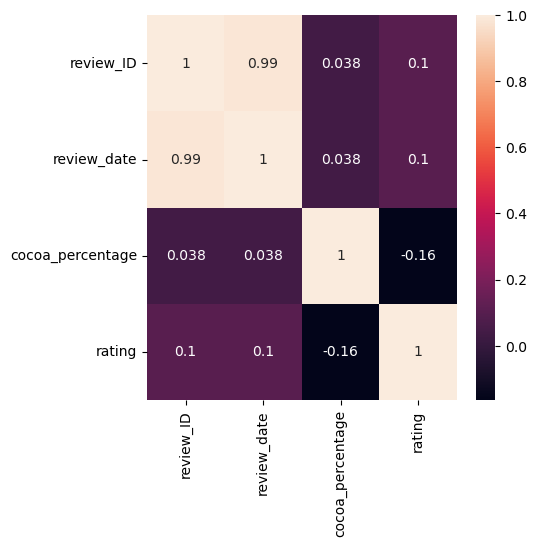

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(5,5))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

Analysis:
- Almost perfect correlation between review_ID and review_date (0.99): This was expected ason data description, the ID is a value linked to when the review was entered in the database. Higher = more recent.
- Slight negative relationship between rating and cocoa percentage (-0.16): as cocoa percentage increases, ratings tend to slightly decrease.
- Very weak positive relation between rating and time (0.1): there were slightly higher ratings on newer reviews.
- Considering a coefficient of 0.038, there is no clear tren correlating cocoa percentage and time.
- Conclusion: There are no strong numerical variables that highly correlates with ratings. The most impactful relationships are most likely derived from qualitative data.

### Scatterplot

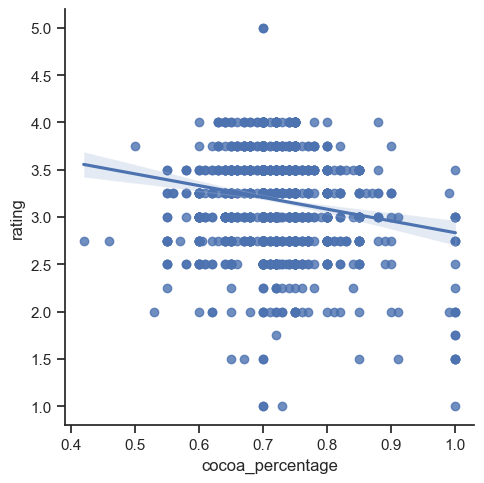

In [39]:
# Create a scatterplot for the "rating" and "cocoa_percentage" columns in seaborn

scatterplot = sns.lmplot(x = 'cocoa_percentage', y = 'rating', data = df)

Analysis:
- The  scatterplot visually confirms the findings on the previous heatmap - i.e there's a negative linear relationship represented by the downward regression line.
- The confidence band is more narrow, showing a weak trend.
- When checking vertical spread, the data shows a really low predictability - i.e ratings vary highly through any cocoa percentage, having a little less datapoints on the extremes and more concentration on middle percentages. However, there's no specific trend that would indicate that certain cocoa percentage would have higher or lower rating, as it varies from 1 to 5.
- Conclusion: This overall confirms the weak correlation overall.

### Pair plots

In [17]:
# Keep only the variables you want to use in the pair plot - dropping review_ID as we have redundat data with review_date

sub_2 = sub[['review_date', 'cocoa_percentage', 'rating']]

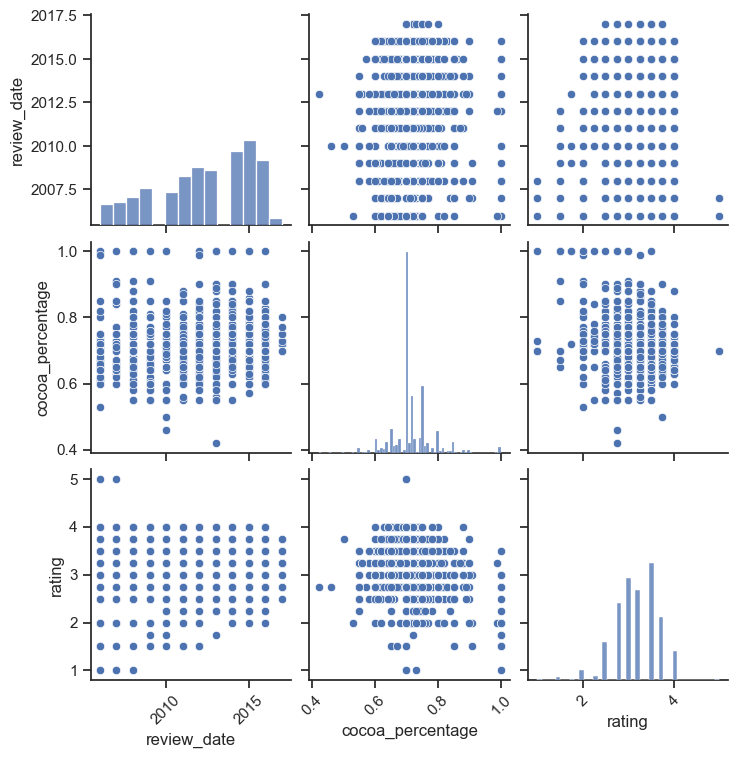

In [43]:
# Create a pair plot 

g = sns.pairplot(sub_2)

# Iterate through the axes on the bottom row (row index 2, or g.axes[-1])
# and rotate the labels for better fit.
for ax in g.axes[-1]:
    ax.tick_params(axis='x', rotation=45)


The pair plots reveal the same trends previously analyzed. We can also see a concentration on mid-values regarding ratings, with less frequency on extremes. The same happens with cocoa percentage.
Regarding review dates, there are more reviews conducted on the recent years than older ones.
For the future, I would like to concentrate more on the qualitative data, as they might have a bigger correlation with ratings, as all the correlations found so far were weak or inexistent.

### Categorical plot

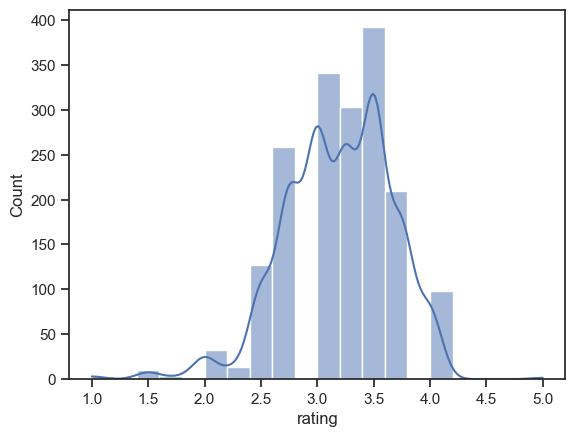

In [41]:
# Creating a categorical variable that splits the "rating" column into categories

cat_plot = sns.histplot(df['rating'], bins = 20, kde = True)

In [29]:
df.loc[df['rating'] < 2, 'quality_tier'] = 'Poor'
df.loc[(df['rating'] >= 2) & (df['rating'] < 3), 'quality_tier'] = 'Good'
df.loc[(df['rating'] >= 3) & (df['rating'] < 4), 'quality_tier'] = 'Very Good'
df.loc[df['rating'] >= 4, 'quality_tier'] = 'Excellent'

In [30]:
# Checking new category
df['quality_tier'].value_counts(dropna = False)

quality_tier
Very Good    1246
Good          432
Excellent     100
Poor           17
Name: count, dtype: int64

In [32]:
df.columns

Index(['company_manufacturer', 'bar_origin', 'review_ID', 'review_date',
       'cocoa_percentage', 'company_location', 'rating', 'bean_region',
       'quality_tier'],
      dtype='object')

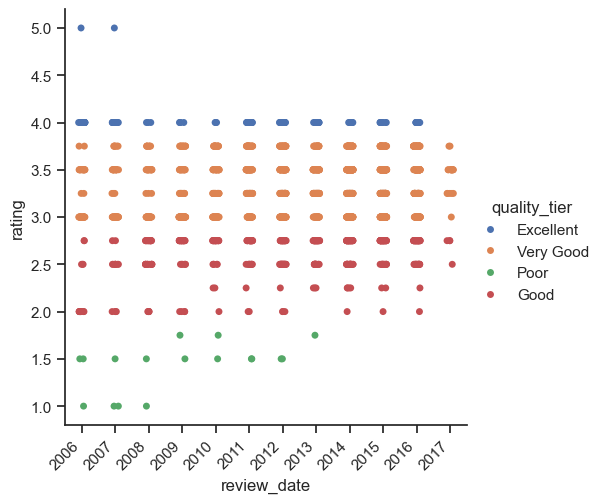

In [45]:
# Create a categorical plot in seaborn using the quality_tier created above

plot_quality = sns.set(style="ticks")
plot_quality = sns.catplot(x="review_date", y="rating", hue="quality_tier", data=df)

# 2. Rotate the x-axis labels by 45 degrees for better spacing
plt.xticks(rotation=45, ha='right')
plt.show()

Conclusion: The highest and lowest quality_tier chocolate bars were ranked on the earlier years, with fewer reviews - perhaps it set standards for upcoming ones. As the years go by, the reviews are more concentrated on middle rating rates. It is important to note though that the review date does not seem to strongly correlate with ratings, as the quality tiers are distributed throughout all the years - you are just as likely to find a very good bar in 2006, as in 2017.
It's also important to notie the clusters are densier at the right side of the graphic than left, meaning that more data was entered on later years than early years, which shows a different data distribution.

## Export visualizations

In [46]:
# Saving outside of Jupyter as an image
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_rate_cocoa%.png'), bbox_inches='tight')
corr.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap.png'), bbox_inches='tight')
g.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'pair_plot.png'), bbox_inches='tight')
cat_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'categorical_plot_ratecount.png'), bbox_inches='tight')
plot_quality.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'cat_plot_quality.png'), bbox_inches='tight')

## Questions

1- Is there a strong correlation between Cocoa Percentage and the Rating?
- There is no strong correlation between cocoa percentage and rating (-0.16): as cocoa percentage increases, ratings tend to slightly decrease, however the analysis above shows that this is a weak relation. The scatterplot actually shows a really low predictability on ratings based on cocoa percentage - i.e you could have a poor or excellent chocolate for most percentages.


2- Has the average rating of chocolate bars changed over the years?
- The average rating of chocolate bars has not significantly changed over the years covered by this dataset.
The rating scale is temporally stable, meaning the criteria used by experts to score chocolate have remained consistent, although the amount of reviews of reviews has slightly increased compared to early days - which means that distribution could skew the data.

## Hypothesis

* If reviews are newer then they will have better ratings
* If beans are produced south of the equator then they produce better cocoa beans